In [1]:
import pandas as pd
import scipy as sp

from abtools.bayesian import WaldABModel, LognormalABModel

%matplotlib inline

In [2]:
mu = 9
size = 300
delta_true = .015

arppu_a = pd.Series(sp.stats.wald.rvs(loc=mu, size=size, random_state=8228))
arppu_b = pd.Series(sp.stats.wald.rvs(loc=mu * (1 + delta_true), size=size, random_state=8228))

print('ARPPU')
print('Mean: %.4f' % arppu_a.mean())
print('Mean: %.4f' % arppu_b.mean())
print('B больше A на %.4f = %d%%' % (arppu_b.mean()- arppu_a.mean(), 
                                    (arppu_b.mean() / arppu_a.mean()-1)*100))

ARPPU
Mean: 9.9796
Mean: 10.1146
B больше A на 0.1350 = 1%


In [3]:
model = WaldABModel(arppu_a, arppu_b)

In [4]:
model.fit()

Optimization terminated successfully.
         Current function value: 820.971254
         Iterations: 13
         Function evaluations: 26
         Gradient evaluations: 26


100%|██████████| 10000/10000 [00:04<00:00, 2089.56it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c2f20ad68>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f0c2c14ddd8>], dtype=object)

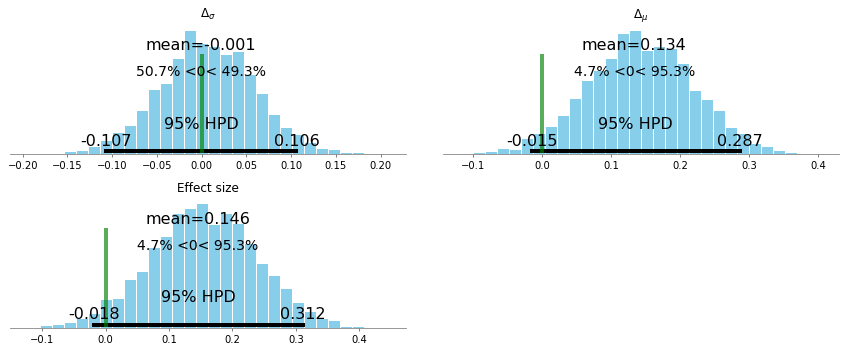

In [5]:
model.plot_deltas()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c2c04db70>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f0c2cb2b4a8>], dtype=object)

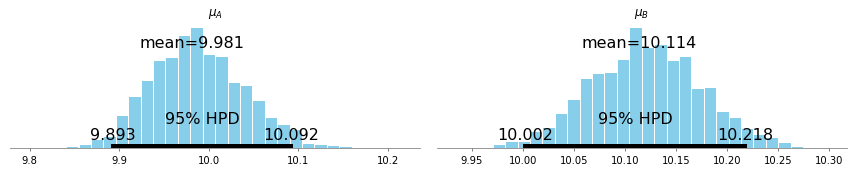

In [6]:
model.plot_params()

In [3]:
model = LognormalABModel(arppu_a, arppu_b)
model.fit()

Optimization terminated successfully.
         Current function value: 791.905847
         Iterations: 52
         Function evaluations: 68
         Gradient evaluations: 68


100%|██████████| 10000/10000 [00:06<00:00, 1512.62it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dc4dfca90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2dc25b27b8>], dtype=object)

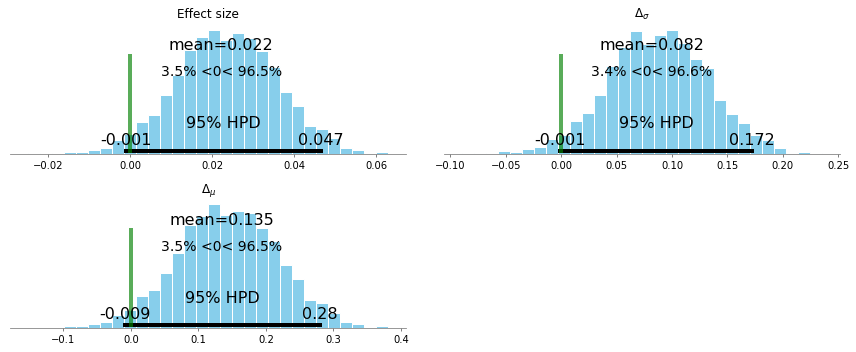

In [4]:
model.plot_deltas()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2dc2c37278>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2dc5cfc908>], dtype=object)

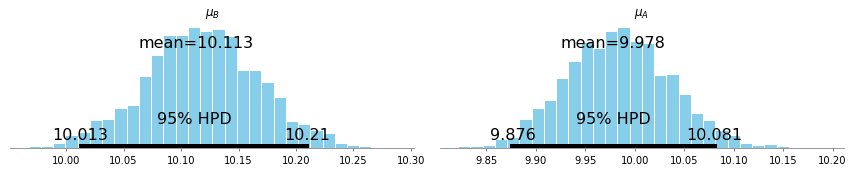

In [5]:
model.plot_params()

In [6]:
model.summary()

,mean,sd,mc_error,hpd_2.5,hpd_97.5
$\alpha_A$,712.620853,215.694742,20.853890,313.072580,999.520070
$\beta_A$,5.555728,1.754446,0.168327,2.137918,8.760473
$\lambda_A$,129.217765,10.685493,0.669229,109.385708,150.434766
$\mu_{ln(A)}$,2.296464,0.005300,0.000137,2.286207,2.306619
$\alpha_B$,0.021279,0.010336,0.000231,0.010009,0.041538
$\beta_B$,504.980457,289.623033,6.534790,42.614502,992.720022
$\lambda_B$,130.840776,10.879307,0.279275,109.982489,151.475777
$\mu_{ln(B)}$,2.309927,0.004887,0.000115,2.300376,2.319757
$\mu_A$,9.977921,0.053159,0.001430,9.876375,10.080935
$\mu_B$,10.112647,0.049547,0.001177,10.012643,10.209731
